<a href="https://colab.research.google.com/github/Simrawr/leaves/blob/main/alexnet_pretrained_leaf_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch torchvision

In [2]:
import torch
print(torch.__version__)

2.0.1+cu118


In [3]:
from torchvision import datasets, transforms, models
data_dir = "data2/"


In [4]:
import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained=True)
model.eval()

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:02<00:00, 82.4MB/s]


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')



Mounted at /content/gdrive


In [6]:
!unzip gdrive/My\ Drive/data2.zip

Streaming output truncated to the last 5000 lines.
  inflating: data2/val/corn healthy/4a960b84-d0be-4118-83bf-24c46678b7f6___R.S_HL 0624 copy 2.jpg  
  inflating: __MACOSX/data2/val/corn healthy/._4a960b84-d0be-4118-83bf-24c46678b7f6___R.S_HL 0624 copy 2.jpg  
  inflating: data2/val/corn healthy/139db478-1c5e-4749-9b14-885376bfd8e3___R.S_HL 5493 copy 3.jpg  
  inflating: __MACOSX/data2/val/corn healthy/._139db478-1c5e-4749-9b14-885376bfd8e3___R.S_HL 5493 copy 3.jpg  
  inflating: data2/val/corn healthy/ad07f4f7-c5a1-42f3-8007-bda26301a4c7___R.S_HL 8111 copy 2.jpg  
  inflating: __MACOSX/data2/val/corn healthy/._ad07f4f7-c5a1-42f3-8007-bda26301a4c7___R.S_HL 8111 copy 2.jpg  
  inflating: data2/val/corn healthy/87f58832-076a-41b1-b8d0-181077b5f478___R.S_HL 5560 copy 2.jpg  
  inflating: __MACOSX/data2/val/corn healthy/._87f58832-076a-41b1-b8d0-181077b5f478___R.S_HL 5560 copy 2.jpg  
  inflating: data2/val/corn healthy/deb6c76a-4778-4cf2-bfc0-9750451bc9fc___R.S_HL 5512 copy.jpg  
  infla

alt: !unzip data2.zip

In [7]:
train_data = datasets.ImageFolder(data_dir + '/train')
val_data = datasets.ImageFolder(data_dir + '/val')

In [8]:
train_transforms = transforms.Compose([transforms.RandomRotation(30), #data augumnetation
                                       transforms.RandomResizedCrop(224),#resize
                                       transforms.RandomHorizontalFlip(), #data augumnetation
                                       transforms.ToTensor()])
val_transforms = transforms.Compose([transforms.RandomResizedCrop(224), #resize
                                      transforms.ToTensor()])
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
val_data = datasets.ImageFolder(data_dir + '/val', transform=val_transforms)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=8, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=8)
dataiter = iter(train_loader)
images, classes  = next(dataiter)
print(type(images))
print(images.shape)
print(classes.shape)

<class 'torch.Tensor'>
torch.Size([8, 3, 224, 224])
torch.Size([8])


In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [12]:
import torch.nn as nn
import numpy as np
class CropDetectCNN(nn.Module):
    # initialize the class and the parameters
    def __init__(self):
        super(CropDetectCNN, self).__init__()

        # convolutional layer 1 & max pool layer 1
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3),
            nn.MaxPool2d(kernel_size=2))

        # convolutional layer 2 & max pool layer 2
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=3, padding=1, stride=2),
            nn.MaxPool2d(kernel_size=2))

        # convolutional layer 3 & max pool layer 3
        self.layer3 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1, stride=3),
            nn.MaxPool2d(kernel_size=2))

        # convolutional layer 4 & max pool layer 4
        self.layer4 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=2, stride=2),
            nn.MaxPool2d(kernel_size=2))

        #Fully connected layer
        self.fc = nn.Linear(128*2*2, 39)

    # Feed forward the network
    def forward(self, x):
        out = self.layer1(x.to(device))
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out
# model = CropDetectCNN().to(device)
model.to(device)
print(model)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [13]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


In [14]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [15]:
print(device)

cuda


if torch.cuda.is_available():
  model.cuda()

```
# This is formatted as code
```



In [16]:
print(train_data)
print(train_data.classes)

Dataset ImageFolder
    Number of datapoints: 5054
    Root location: data2//train
    StandardTransform
Transform: Compose(
               RandomRotation(degrees=[-30.0, 30.0], interpolation=nearest, expand=False, fill=0)
               RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
['apple black rot', 'apple scab', 'cedar apple rust', 'cherry healthy', 'cherry powdery mildew', 'corn cercospora leaf spot gray leaf spot', 'corn common rust', 'corn healthy', 'corn northern leaf blight', 'grape black rot', 'grape esca (black measles)', 'grape healthy', 'grape leaf blight (isariopsis leaf spot)', 'healthy', 'orange haunglongbing (citrus greening)', 'peach bacterial spot', 'peach healthy', 'pepper bacterial spot', 'pepper healthy', 'potato early blight', 'potato healthy', 'potato late blight', 'rice BrownSpot', 'rice Healthy', 'rice Hispa', 

In [17]:
epochs = 1 # run more iterations
# if torch.cuda.is_available():
  # model.cuda()

for epoch in range(epochs):
    running_loss = 0
    for images, classes in train_loader:
        # To device - to transfrom the image and classes to CPU|GPU
        images, classes = images.to(device), classes.to(device)

        # clears old gradients from the last step
        optimizer.zero_grad()

        # train the images

        outputs = model(images)


        #calculate the loss given the outputs and the classes
        loss = criterion(outputs, classes)

        # compute the loss of every parameter
        loss.backward()

        # apply the optimizer and its parameters
        optimizer.step()

        #update the loss
        running_loss += loss.item()

    else:
        validation_loss = 0
        accuracy = 0

        # to make the model run faster we are using the gradients on the train
        with torch.no_grad():
            # specify that this is validation and not training
            model.eval()
            for images, classes in val_loader:
                # Use GPU
                images, classes = images.to(device), classes.to(device)

                # validate the images
                outputs = model(images)

                # compute validation loss
                loss = criterion(outputs, classes)

                #update loss
                validation_loss += loss.item()

                # get the exponential of the outputs
                ps = torch.exp(outputs)

                #Returns the k largest elements of the given input tensor along a given dimension.
                top_p, top_class = ps.topk(1, dim=1)

                # reshape the tensor
                equals = top_class == classes.view(*top_class.shape)

                # calculate the accuracy.
                accuracy += torch.mean(equals.type(torch.FloatTensor))

        # change the mode to train for the next epochs
        model.train()
        print("Epoch: {}/{}.. ".format(epoch+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Valid Loss: {:.3f}.. ".format(validation_loss/len(val_loader)),
              "Valid Accuracy: {:.3f}".format(accuracy/len(val_loader)))

Epoch: 1/1..  Training Loss: 2.650..  Valid Loss: 4.783..  Valid Accuracy: 0.235


In [18]:
print(torch.cuda.is_available())

True


In [19]:
model.class_to_idx = train_data.class_to_idx
model.class_to_idx.items()

dict_items([('apple black rot', 0), ('apple scab', 1), ('cedar apple rust', 2), ('cherry healthy', 3), ('cherry powdery mildew', 4), ('corn cercospora leaf spot gray leaf spot', 5), ('corn common rust', 6), ('corn healthy', 7), ('corn northern leaf blight', 8), ('grape black rot', 9), ('grape esca (black measles)', 10), ('grape healthy', 11), ('grape leaf blight (isariopsis leaf spot)', 12), ('healthy', 13), ('orange haunglongbing (citrus greening)', 14), ('peach bacterial spot', 15), ('peach healthy', 16), ('pepper bacterial spot', 17), ('pepper healthy', 18), ('potato early blight', 19), ('potato healthy', 20), ('potato late blight', 21), ('rice BrownSpot', 22), ('rice Healthy', 23), ('rice Hispa', 24), ('rice LeafBlast', 25), ('squash powdery mildew', 26), ('strawberry healthy', 27), ('strawberry leaf scorch', 28), ('tomato bacterial spot', 29), ('tomato early blight', 30), ('tomato healthy', 31), ('tomato late blight', 32), ('tomato leaf mold', 33), ('tomato mosaic virus', 34), ('t

In [20]:
from PIL import Image
import numpy as np
# Plot the image
def imshow(image_numpy_array):
    fig, ax = plt.subplots()

    # convert the shape from (3, 256, 256) to (256, 256, 3)
    image = image_numpy_array.transpose(0, 1, 2)
    ax.imshow(image)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax
def process_image(image_path):

    test_transform = transforms.Compose([transforms.RandomResizedCrop(224),
                                         transforms.ToTensor()])

    im = Image.open(image_path)
    imshow(np.array(im))
    im = test_transform(im)
    return im

In [21]:
def predict(image, model):
    # we have to process the image as we did while training the others
    image = process_image(image)

    #returns a new tensor with a given dimension
    image_input = image.unsqueeze(0)

    # Convert the image to either gpu|cpu
    image_input.to(device)

    # Pass the image through the model
    outputs = model(image_input).to(device)
    ps = torch.exp(outputs)

    # return the top 5 most predicted classes
    top_p, top_cls = ps.topk(5, dim=1)
    # convert to numpy, then to list
    top_cls = top_cls.detach().cpu().numpy().tolist()[0]

    # covert indices to classes
    idx_to_class = {v: k for k, v in model.class_to_idx.items()}

    top_cls = [idx_to_class[top_class] for top_class in top_cls]

    return top_p, top_cls

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
def plot_solution(image_path, ps, classes):
    plt.figure(figsize = (6,10))

    image = process_image(image_path)
    plt.subplot(2,1,2)
    sns.barplot(x=ps, y=classes, color=sns.color_palette()[2]);
    plt.show()

RuntimeError: ignored

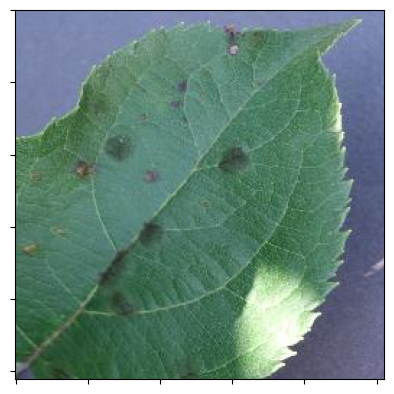

In [23]:
image = "data2/val/apple scab/01f3deaa-6143-4b6c-9c22-620a46d8be04___FREC_Scab 3112.JPG"
ps, classes = predict(image, model)
ps = ps.detach().cpu().numpy().tolist()[0]
print(ps)
print(classes)
plot_solution(image, ps, classes)